In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

In [2]:
def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res

In [3]:
def covariance(x, y):
    return np.sum(x * y) / (len(x) - 1)

In [4]:
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [5]:
# Для начала отмасштабируем выборку
X = X.astype(float)

X = standard_scale(X)
X[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 4), (30, 4))

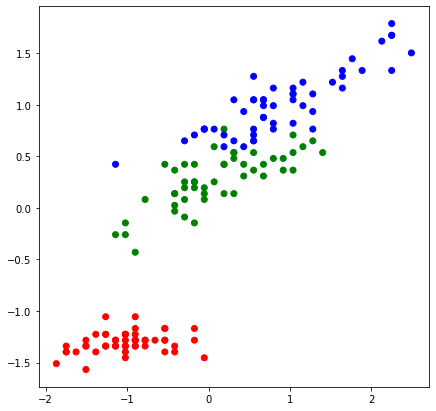

In [7]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 2], c=y, cmap=cmap);

## 1. Проведем классификацию методом k-ближайших соседей с "голосованием" по расстоянию  до классифицируемого объекта

In [8]:
def e_metrics(x1, x2):
    distance = np.sum(np.square(x1 - x2))
    return np.sqrt(distance)

In [9]:
def knn(x_train, y_train, x_test, k):
    
    answers_weight = []
    for x in x_test:
        test_distances = []

        test_distances = [(e_metrics(x, xx), y_train[i]) for i, xx in enumerate(x_train)]

        # создаем словарь со всеми возможными классами
        classes_dist = {class_item: 0.0 for class_item in set(y_train)}

        # Сортируем список и среди первых k элементов подсчитаем расстояние
        for d in sorted(test_distances)[0:k]:
            classes_dist[d[1]] += 0.5 ** d[0]

        # Записываем в список ответов наиболее часто встречающийся класс
        answers_weight.append(sorted(classes_dist, key=classes_dist.get)[-1])
    
    return answers_weight

In [10]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [11]:
k = 5

y_pred_weight = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred_weight, y_test):.3f}')

Точность алгоритма при k = 5: 0.967


## Метод главных компонент (PCA)

In [12]:
print(f'Ковариация 0 признака (дисперсия 0 признака) {covariance(X[:, 0], X[:, 0])}')
print(f'Ковариация 1 признака (дисперсия 1 признака) {covariance(X[:, 1], X[:, 1])}')
print(f'Ковариация 2 признака (дисперсия 2 признака) {covariance(X[:, 2], X[:, 2])}')
print(f'Ковариация 3 признака (дисперсия 3 признака) {covariance(X[:, 3], X[:, 3])}')
print(f'Ковариация 0 и 1 признака {covariance(X[:, 0], X[:, 1])}')
print(f'Ковариация 0 и 2 признака {covariance(X[:, 0], X[:, 2])}')
print(f'Ковариация 0 и 3 признака {covariance(X[:, 0], X[:, 3])}')
print(f'Ковариация 1 и 2 признака {covariance(X[:, 1], X[:, 2])}')
print(f'Ковариация 1 и 3 признака {covariance(X[:, 1], X[:, 3])}')
print(f'Ковариация 2 и 3 признака {covariance(X[:, 2], X[:, 3])}')
cov = np.cov(X.T)
cov

Ковариация 0 признака (дисперсия 0 признака) 1.0067114093959733
Ковариация 1 признака (дисперсия 1 признака) 1.0067114093959741
Ковариация 2 признака (дисперсия 2 признака) 1.006711409395973
Ковариация 3 признака (дисперсия 3 признака) 1.0067114093959733
Ковариация 0 и 1 признака -0.11835884308691484
Ковариация 0 и 2 признака 0.8776044723690434
Ковариация 0 и 3 признака 0.8234306640317876
Ковариация 1 и 2 признака -0.43131554127235555
Ковариация 1 и 3 признака -0.36858315356017374
Ковариация 2 и 3 признака 0.9693276155061705


array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [13]:
(X.T @ X) / len(X)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [14]:
eig_val, eig_vecs = np.linalg.eig(X.T @ X)
display(eig_val, eig_vecs)

array([437.77467248, 137.10457072,  22.01353134,   3.10722546])

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [15]:
vec0 = eig_vecs[:, 0]
vec1 = eig_vecs[:, 1]
vec2 = eig_vecs[:, 2]
vec3 = eig_vecs[:, 3]
vec0, vec1, vec2, vec3

(array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]),
 array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]),
 array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]),
 array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))

In [16]:
eig_sum = sum(eig_val)
[(i / eig_sum) * 100 for i in sorted(eig_val, reverse=True)]

[72.96244541329986, 22.850761786701774, 3.66892188928288, 0.5178709107154819]

### При двух компонентах

In [17]:
v2 = np.column_stack((vec0, vec1))
v2

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [18]:
Z2 = np.dot(X, v2)
Z2[:10]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356]])

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reduced[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [20]:
Z2.shape

(150, 2)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(Z2, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [22]:
k = 5

y_pred_weight = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred_weight, y_test):.3f}')

Точность алгоритма при k = 5: 0.867


### При трех компонентах

In [23]:
v3 = np.column_stack((vec0, vec1, vec2))
v3

array([[ 0.52106591, -0.37741762, -0.71956635],
       [-0.26934744, -0.92329566,  0.24438178],
       [ 0.5804131 , -0.02449161,  0.14212637],
       [ 0.56485654, -0.06694199,  0.63427274]])

In [24]:
Z3 = np.dot(X, v3)
Z3[:5]

array([[-2.26470281, -0.4800266 , -0.12770602],
       [-2.08096115,  0.67413356, -0.23460885],
       [-2.36422905,  0.34190802,  0.04420148],
       [-2.29938422,  0.59739451,  0.09129011],
       [-2.38984217, -0.64683538,  0.0157382 ]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(Z3, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 3), (30, 3))

In [26]:
k = 5

y_pred_weight = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred_weight, y_test):.3f}')

Точность алгоритма при k = 5: 0.967


### При четырех компонентах

In [27]:
v4 = np.column_stack((vec0, vec1, vec2, vec3))
v4

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [28]:
Z4 = np.dot(X, v4)
Z4[:5]

array([[-2.26470281, -0.4800266 , -0.12770602,  0.0241682 ],
       [-2.08096115,  0.67413356, -0.23460885,  0.10300677],
       [-2.36422905,  0.34190802,  0.04420148,  0.02837705],
       [-2.29938422,  0.59739451,  0.09129011, -0.06595556],
       [-2.38984217, -0.64683538,  0.0157382 , -0.03592281]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(Z4, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [30]:
k = 5

y_pred_weight = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred_weight, y_test):.3f}')

Точность алгоритма при k = 5: 0.967


### При одной компоненте

In [31]:
v1 = vec0
v1

array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])

In [32]:
Z1 = np.dot(X, v1)
Z1

array([-2.26470281, -2.08096115, -2.36422905, -2.29938422, -2.38984217,
       -2.07563095, -2.44402884, -2.23284716, -2.33464048, -2.18432817,
       -2.1663101 , -2.32613087, -2.2184509 , -2.6331007 , -2.1987406 ,
       -2.26221453, -2.2075877 , -2.19034951, -1.898572  , -2.34336905,
       -1.914323  , -2.20701284, -2.7743447 , -1.81866953, -2.22716331,
       -1.95184633, -2.05115137, -2.16857717, -2.13956345, -2.26526149,
       -2.14012214, -1.83159477, -2.61494794, -2.44617739, -2.10997488,
       -2.2078089 , -2.04514621, -2.52733191, -2.42963258, -2.16971071,
       -2.28647514, -1.85812246, -2.5536384 , -1.96444768, -2.13705901,
       -2.0697443 , -2.38473317, -2.39437631, -2.22944655, -2.20383344,
        1.10178118,  0.73133743,  1.24097932,  0.40748306,  1.0754747 ,
        0.38868734,  0.74652974, -0.48732274,  0.92790164,  0.01142619,
       -0.11019628,  0.44069345,  0.56210831,  0.71956189, -0.0333547 ,
        0.87540719,  0.35025167,  0.15881005,  1.22509363,  0.16

In [33]:
X_train, X_test, y_train, y_test = train_test_split(Z1, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120,), (30,))

In [34]:
k = 6

y_pred_weight = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred_weight, y_test):.3f}')

Точность алгоритма при k = 6: 0.867


In [35]:
np.around(Z4.T @ Z4, decimals = 1)

array([[437.8,  -0. ,   0. ,  -0. ],
       [ -0. , 137.1,   0. ,  -0. ],
       [  0. ,   0. ,  22. ,  -0. ],
       [ -0. ,  -0. ,  -0. ,   3.1]])

In [36]:
np.around(Z3.T @ Z3, decimals = 1)

array([[437.8,  -0. ,   0. ],
       [ -0. , 137.1,   0. ],
       [  0. ,   0. ,  22. ]])

In [38]:
np.around(Z2.T @ Z2, decimals = 1)

array([[437.8,  -0. ],
       [ -0. , 137.1]])

In [39]:
np.around(Z1.T @ Z1, decimals = 1)

437.8

### При одной и двух компонентах точность 0.867, при трех и четырех компонентах точность достигается как и при классификации k-ближайшими соседями и равна 0.967.

### 2.Нахождение собственных значений и собственных векторов с использованием numpy.linalg.svd()

In [40]:
X.shape

(150, 4)

In [41]:
u, s, vh = np.linalg.svd(X, full_matrices=True)

In [42]:
np.around(u, decimals = 2)

array([[-0.11, -0.04,  0.03, ...,  0.05,  0.  ,  0.  ],
       [-0.1 ,  0.06,  0.05, ...,  0.01,  0.08,  0.01],
       [-0.11,  0.03, -0.01, ...,  0.03,  0.18,  0.15],
       ...,
       [ 0.07, -0.02, -0.04, ...,  0.99, -0.01, -0.  ],
       [ 0.07, -0.09, -0.2 , ..., -0.01,  0.95, -0.02],
       [ 0.05,  0.  , -0.11, ..., -0.  , -0.02,  0.98]])

In [43]:
s

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [44]:
vh

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274],
       [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]])

### При одной компоненте

In [45]:
v1 = vh[0]
v1

array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])

In [46]:
Z1 = np.dot(X, v1)
Z1

array([-2.26470281, -2.08096115, -2.36422905, -2.29938422, -2.38984217,
       -2.07563095, -2.44402884, -2.23284716, -2.33464048, -2.18432817,
       -2.1663101 , -2.32613087, -2.2184509 , -2.6331007 , -2.1987406 ,
       -2.26221453, -2.2075877 , -2.19034951, -1.898572  , -2.34336905,
       -1.914323  , -2.20701284, -2.7743447 , -1.81866953, -2.22716331,
       -1.95184633, -2.05115137, -2.16857717, -2.13956345, -2.26526149,
       -2.14012214, -1.83159477, -2.61494794, -2.44617739, -2.10997488,
       -2.2078089 , -2.04514621, -2.52733191, -2.42963258, -2.16971071,
       -2.28647514, -1.85812246, -2.5536384 , -1.96444768, -2.13705901,
       -2.0697443 , -2.38473317, -2.39437631, -2.22944655, -2.20383344,
        1.10178118,  0.73133743,  1.24097932,  0.40748306,  1.0754747 ,
        0.38868734,  0.74652974, -0.48732274,  0.92790164,  0.01142619,
       -0.11019628,  0.44069345,  0.56210831,  0.71956189, -0.0333547 ,
        0.87540719,  0.35025167,  0.15881005,  1.22509363,  0.16

In [47]:
X_train, X_test, y_train, y_test = train_test_split(Z1, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120,), (30,))

In [48]:
k = 5

y_pred_weight = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred_weight, y_test):.3f}')

Точность алгоритма при k = 5: 0.867


### При двух компонентах

In [49]:
v2 = np.column_stack((vh[0], vh[1]))
v2

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [50]:
Z2 = np.dot(X, v2)
Z2[:5]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538]])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(Z2, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [52]:
k = 5

y_pred_weight = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred_weight, y_test):.3f}')

Точность алгоритма при k = 5: 0.867


### При трех компонентах

In [53]:
v3 = np.column_stack((vh[0], vh[1], vh[2]))
v3

array([[ 0.52106591, -0.37741762,  0.71956635],
       [-0.26934744, -0.92329566, -0.24438178],
       [ 0.5804131 , -0.02449161, -0.14212637],
       [ 0.56485654, -0.06694199, -0.63427274]])

In [54]:
Z3 = np.dot(X, v3)
Z3[:10]

array([[-2.26470281, -0.4800266 ,  0.12770602],
       [-2.08096115,  0.67413356,  0.23460885],
       [-2.36422905,  0.34190802, -0.04420148],
       [-2.29938422,  0.59739451, -0.09129011],
       [-2.38984217, -0.64683538, -0.0157382 ],
       [-2.07563095, -1.48917752, -0.02696829],
       [-2.44402884, -0.0476442 , -0.3354704 ],
       [-2.23284716, -0.22314807,  0.0886955 ],
       [-2.33464048,  1.11532768, -0.14507686],
       [-2.18432817,  0.46901356,  0.25376557]])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(Z3, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 3), (30, 3))

In [56]:
k = 5

y_pred_weight = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred_weight, y_test):.3f}')

Точность алгоритма при k = 5: 0.967


### При четырех компонентах

In [57]:
v4 = np.column_stack((vh[0], vh[1], vh[2], vh[3]))
v4

array([[ 0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [-0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199, -0.63427274,  0.52359713]])

In [58]:
Z4 = np.dot(X, v4)
Z4[:10]

array([[-2.26470281, -0.4800266 ,  0.12770602,  0.0241682 ],
       [-2.08096115,  0.67413356,  0.23460885,  0.10300677],
       [-2.36422905,  0.34190802, -0.04420148,  0.02837705],
       [-2.29938422,  0.59739451, -0.09129011, -0.06595556],
       [-2.38984217, -0.64683538, -0.0157382 , -0.03592281],
       [-2.07563095, -1.48917752, -0.02696829,  0.00660818],
       [-2.44402884, -0.0476442 , -0.3354704 , -0.03677556],
       [-2.23284716, -0.22314807,  0.0886955 , -0.0246121 ],
       [-2.33464048,  1.11532768, -0.14507686, -0.02685922],
       [-2.18432817,  0.46901356,  0.25376557, -0.03989929]])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(Z4, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [60]:
k = 5

y_pred_weight = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred_weight, y_test):.3f}')

Точность алгоритма при k = 5: 0.967


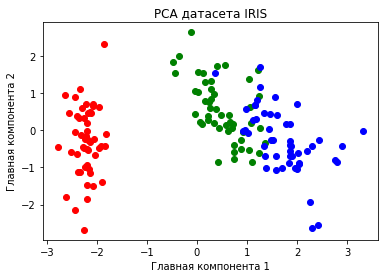

In [61]:
iris = datasets.load_iris()
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z2[y == i, 0], Z2[y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

In [62]:
# Найдем собственные векторы и собственные значения
 
covariance_matrix = X.T @ X

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения и собственные векторы в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения и собственные векторы в порядке убывания:
(437.774672479799, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
(137.1045707202106, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(22.013531335697273, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))
(3.1072254642928896, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


In [63]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперь оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[72.96244541329986, 22.850761786701774, 3.66892188928288, 0.5178709107154819]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]
